In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, load_iris
from sklearn.metrics import silhouette_score


from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
    adjusted_rand_score,
    normalized_mutual_info_score,
)

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

ARTIFACTS_DIR = Path("artifacts")
ARTIFACTS_DIR.mkdir(parents=True, exist_ok=True)

In [11]:
file_1 = 'data/S07-hw-dataset-01.csv'
file_2 = 'data/S07-hw-dataset-02.csv'
file_3 = 'data/S07-hw-dataset-03.csv'
data_first = pd.read_csv(file_1, sep=',')
data_second = pd.read_csv(file_2, sep=',')
data_third = pd.read_csv(file_3, sep=',')

In [12]:
data_first.head()

,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
0,0,-0.536647,-69.812900,-0.002657,71.743147,-11.396498,-12.291287,-6.836847,-0.504094
1,1,15.230731,52.727216,-1.273634,-104.123302,11.589643,34.316967,-49.468873,0.390356
2,2,18.542693,77.317150,-1.321686,-111.946636,10.254346,25.892951,44.595250,0.325893
3,3,-12.538905,-41.709458,0.146474,16.322124,1.391137,2.014316,-39.930582,0.139297
4,4,-6.903056,61.833444,-0.022466,-42.631335,3.107154,-5.471054,7.001149,0.131213


In [13]:
data_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01        12000 non-null  float64
 2   f02        12000 non-null  float64
 3   f03        12000 non-null  float64
 4   f04        12000 non-null  float64
 5   f05        12000 non-null  float64
 6   f06        12000 non-null  float64
 7   f07        12000 non-null  float64
 8   f08        12000 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


In [14]:
data_first.describe()

,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,5999.50000,-2.424716,19.107804,-0.222063,-8.284501,-0.190717,0.962972,0.033724,0.007638
std,3464.24595,11.014315,60.790338,0.500630,59.269838,7.026435,14.794713,59.541782,0.607053
min,0.00000,-19.912573,-92.892652,-1.590979,-134.303679,-11.869169,-20.521164,-215.098834,-2.633469
25%,2999.75000,-9.472623,-40.282955,-0.125145,-48.345007,-5.132473,-8.807706,-39.900520,-0.401483
50%,5999.50000,-6.869404,54.069335,-0.031753,16.211728,0.444730,-6.134169,-0.578494,0.005306
75%,8999.25000,0.523841,70.280739,0.054980,28.067178,3.942368,2.334426,39.719821,0.410132
max,11999.00000,24.403381,112.229523,0.512277,75.088604,13.717091,41.452857,213.381767,2.490745


In [15]:
data_first.isna().mean()

sample_id    0.0
f01          0.0
f02          0.0
f03          0.0
f04          0.0
f05          0.0
f06          0.0
f07          0.0
f08          0.0
dtype: float64

In [16]:
data_second.head()

,sample_id,x1,x2,z_noise
0,0,0.098849,-1.846034,21.288122
1,1,-1.024516,1.829616,6.072952
2,2,-1.094178,-0.158545,-18.938342
3,3,-1.612808,-1.565844,-11.629462
4,4,1.659901,-2.133292,1.895472


In [17]:
data_second.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  8000 non-null   int64  
 1   x1         8000 non-null   float64
 2   x2         8000 non-null   float64
 3   z_noise    8000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 250.1 KB


In [18]:
data_second.describe()

,sample_id,x1,x2,z_noise
count,8000.00000,8000.000000,8000.000000,8000.000000
mean,3999.50000,0.478867,0.241112,0.110454
std,2309.54541,0.955138,0.663195,8.097716
min,0.00000,-2.487352,-2.499237,-34.056074
25%,1999.75000,-0.116516,-0.242357,-5.392210
50%,3999.50000,0.490658,0.241092,0.132470
75%,5999.25000,1.085263,0.726526,5.655605
max,7999.00000,2.987555,2.995553,29.460076


In [19]:
data_second.isna().mean()

sample_id    0.0
x1           0.0
x2           0.0
z_noise      0.0
dtype: float64

In [20]:
data_third.head()

,sample_id,x1,x2,f_corr,f_noise
0,0,-2.710470,4.997107,-1.015703,0.718508
1,1,8.730238,-8.787416,3.953063,-1.105349
2,2,-1.079600,-2.558708,0.976628,-3.605776
3,3,6.854042,1.560181,1.760614,-1.230946
4,4,9.963812,-8.869921,2.966583,0.915899


In [21]:
data_third.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  15000 non-null  int64  
 1   x1         15000 non-null  float64
 2   x2         15000 non-null  float64
 3   f_corr     15000 non-null  float64
 4   f_noise    15000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 586.1 KB


In [22]:
data_third.describe()

,sample_id,x1,x2,f_corr,f_noise
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.246296,1.033764,0.212776,-0.027067
std,4330.271354,4.592421,4.710791,1.530017,2.506375
min,0.000000,-9.995585,-9.980853,-5.212038,-8.785884
25%,3749.750000,-1.782144,-2.666393,-0.966224,-1.731128
50%,7499.500000,0.664226,1.831257,0.296508,-0.052391
75%,11249.250000,4.435671,4.969630,1.390273,1.673831
max,14999.000000,16.207863,14.271153,5.795876,11.266865


In [23]:
data_third.isna().mean()

sample_id    0.0
x1           0.0
x2           0.0
f_corr       0.0
f_noise      0.0
dtype: float64

In [25]:
X_f = data_first.drop(columns=['sample_id'])
ID_f = data_first['sample_id']
X_s = data_second.drop(columns=['sample_id'])
ID_s = data_second['sample_id']
X_th = data_third.drop(columns=['sample_id'])
ID_th = data_third['sample_id']

In [27]:
preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
X_f_scaled = preprocessing_pipeline.fit_transform(X_f)
X_s_scaled = preprocessing_pipeline.fit_transform(X_s)
X_th_scaled = preprocessing_pipeline.fit_transform(X_th)

In [75]:
def kmeans_labels(X, k, random_state=RANDOM_STATE):
    try:
        model = KMeans(n_clusters=k, random_state=random_state, n_init="auto")
    except TypeError:
        model = KMeans(n_clusters=k, random_state=random_state, n_init=10)
    return model.fit_predict(X)

def compute_metrics_over_k(X, k_values):
    sil = []
    db = []
    ch = []

    for k in k_values:
        labels = kmeans_labels(X, k)

        sil.append(silhouette_score(X, labels))
        db.append(davies_bouldin_score(X, labels))
        ch.append(calinski_harabasz_score(X, labels))

    return np.array(sil), np.array(db), np.array(ch)

def metrics_of_k_plot(k_values, sil, db, ch, save_name):
    plt.figure(figsize=(7, 4))
    plt.plot(k_values, sil, marker="o")
    plt.title("Silhouette vs k (higher is better) " + save_name)
    plt.xlabel("k")
    plt.ylabel("silhouette")
    plt.grid(True, alpha=0.25)
    plt.savefig(str(ARTIFACTS_DIR) + "/figures/KMeans silhouette " + save_name + ".png")
    plt.show()


    plt.figure(figsize=(7, 4))
    plt.plot(k_values, db, marker="o")
    plt.title("Davies-Bouldin vs k (lower is better) " + save_name)
    plt.xlabel("k")
    plt.ylabel("davies_bouldin")
    plt.grid(True, alpha=0.25)
    plt.savefig(str(ARTIFACTS_DIR) + "/figures/KMeans Davies-Bouldin vs k " + save_name + ".png")
    plt.show()


    plt.figure(figsize=(7, 4))
    plt.plot(k_values, ch, marker="o")
    plt.title("Calinski-Harabasz vs k (higher is better) " + save_name)
    plt.xlabel("k")
    plt.ylabel("calinski_harabasz")
    plt.grid(True, alpha=0.25)
    plt.savefig(str(ARTIFACTS_DIR) + "/figures/KMeans Calinski-Harabasz vs k " + save_name + ".png")
    plt.show()

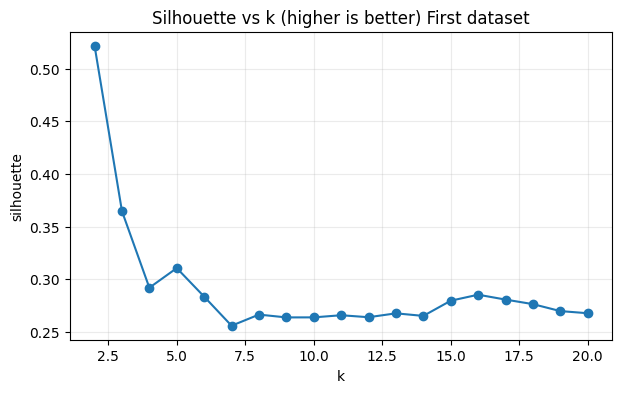

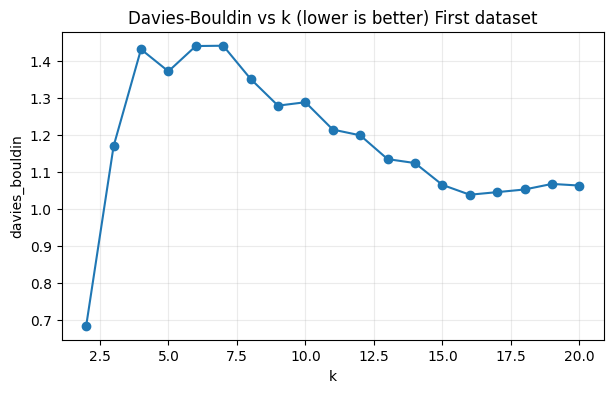

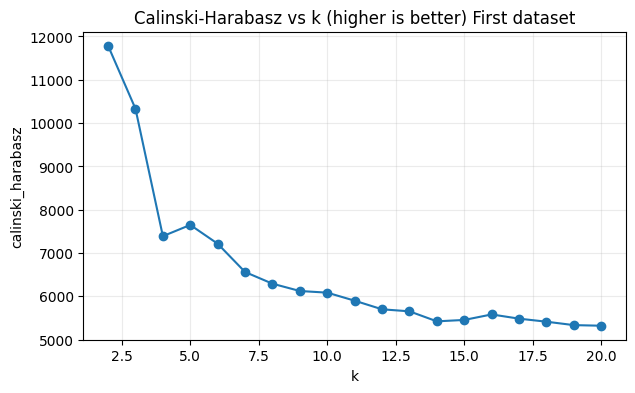

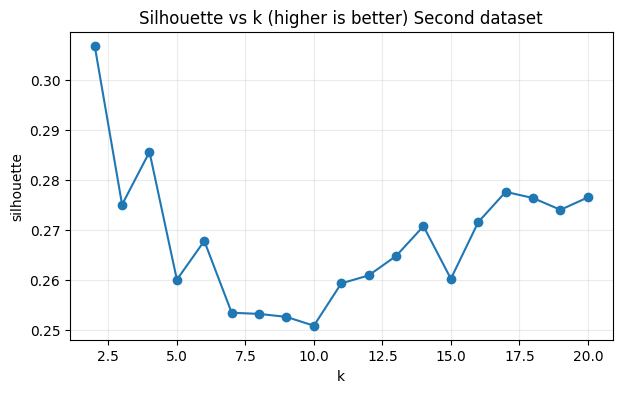

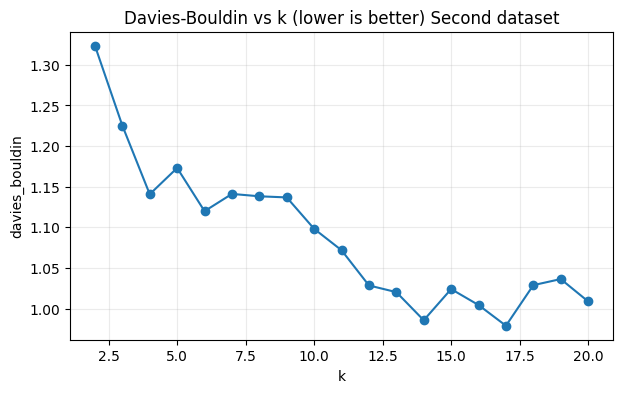

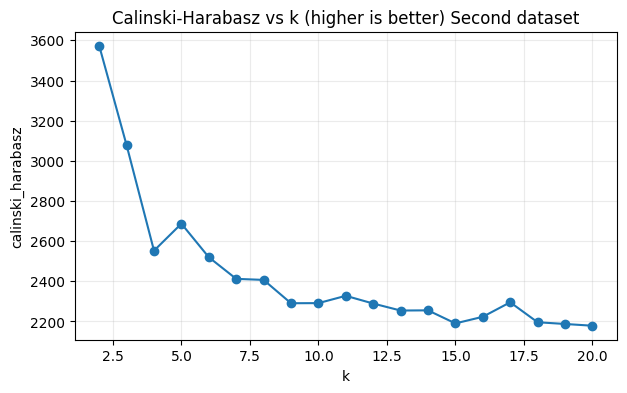

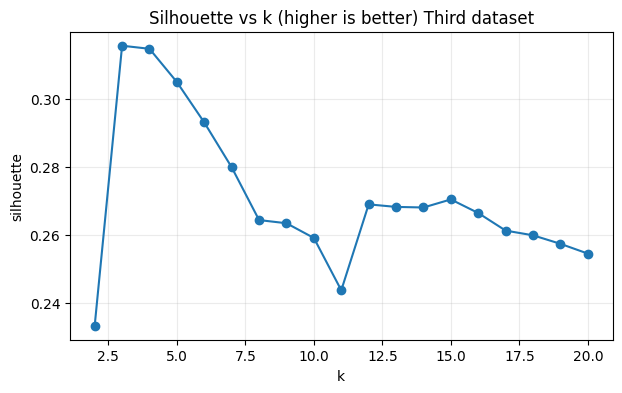

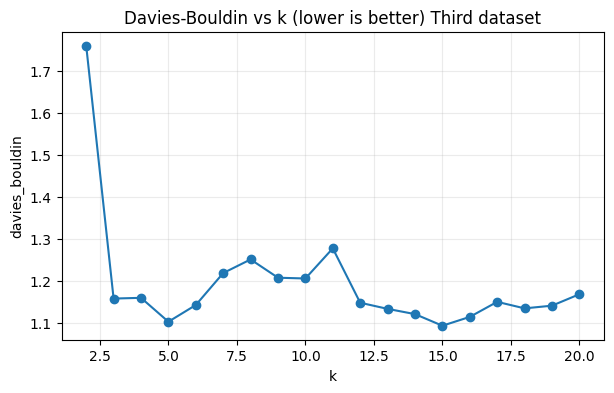

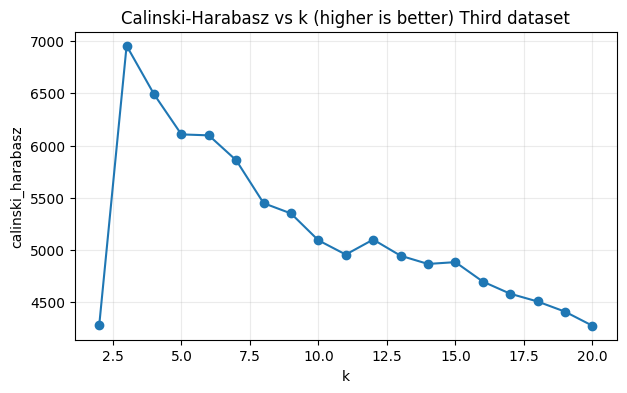

In [76]:
k_values = range(2, 21)
sil_f, db_f, ch_f = compute_metrics_over_k(X_f_scaled, k_values)
sil_s, db_s, ch_s = compute_metrics_over_k(X_s_scaled, k_values)
sil_th, db_th, ch_th = compute_metrics_over_k(X_th_scaled, k_values)
metrics_of_k_plot(k_values, sil_f, db_f, ch_f, "First dataset")
metrics_of_k_plot(k_values, sil_s, db_s, ch_s, "Second dataset")
metrics_of_k_plot(k_values, sil_th, db_th, ch_th, "Third dataset")

In [82]:
def k_distance_plot(X, k=8, save_name="", title="k-distance plot"):
    nn = NearestNeighbors(n_neighbors=k)
    nn.fit(X)
    distances, _ = nn.kneighbors(X)  # distances shape: (n_samples, k)

    kth = np.sort(distances[:, -1])  # расстояние до k-го соседа
    plt.figure(figsize=(7, 4))
    plt.plot(kth)
    plt.title(f"{title + " " + save_name } (k={k})")
    plt.xlabel("sorted points index")
    plt.ylabel(f"distance to {k}-th nearest neighbor")
    plt.grid(True, alpha=0.25)
    plt.savefig(str(ARTIFACTS_DIR) + "/figures/k-distance plot " + save_name + ".png")
    plt.show()

    return kth

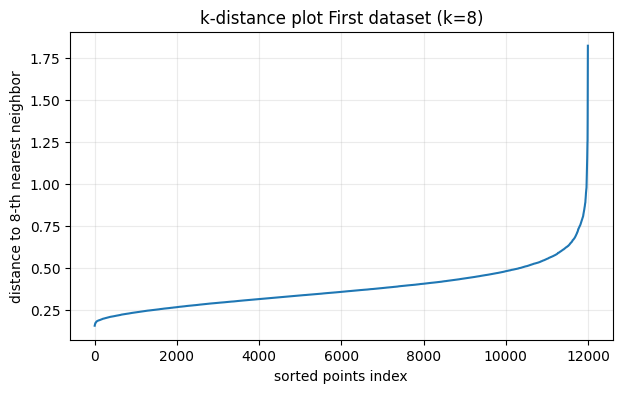

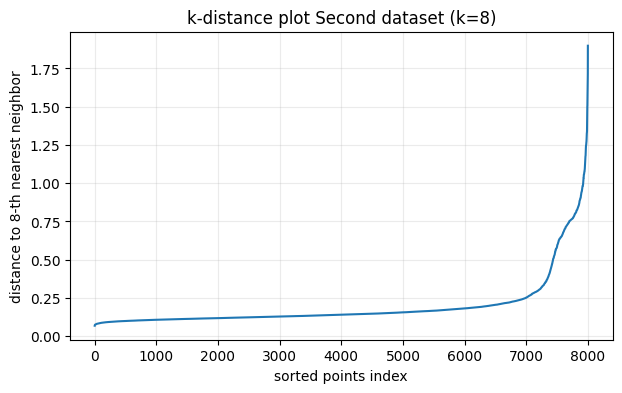

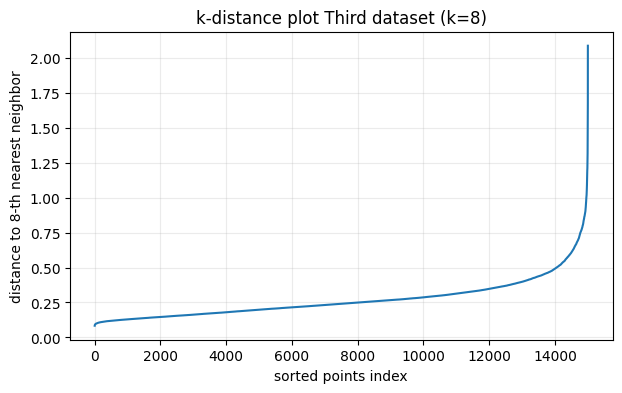

In [83]:
kth_f = k_distance_plot(X_f_scaled, 8, "First dataset")
kth_s = k_distance_plot(X_s_scaled, 8, "Second dataset")
kth_th = k_distance_plot(X_th_scaled, 8, "Third dataset")

In [63]:
def summarize_labels(labels):
    labels = np.asarray(labels)
    n_noise = np.sum(labels == -1)
    n_points = len(labels)
    clusters = sorted([c for c in set(labels) if c != -1])
    return {
        "n_points": n_points,
        "n_clusters": len(clusters),
        "n_noise": int(n_noise),
        "noise_share": float(n_noise / n_points)
    }

def safe_internal_metrics(X, labels):
    labels = np.asarray(labels)
    mask = labels != -1
    X2 = X[mask]
    y2 = labels[mask]

    result = {}

    # если осталось меньше 2 кластеров – метрики бессмысленны
    if len(set(y2)) < 2:
        result["silhouette"] = None
        result["calinski_harabasz"] = None
        result["davies_bouldin"] = None
        return result

    result["silhouette"] = float(silhouette_score(X2, y2))
    result["calinski_harabasz"] = float(calinski_harabasz_score(X2, y2))
    result["davies_bouldin"] = float(davies_bouldin_score(X2, y2))
    return result

In [64]:
eps = 0.6
min_samples = 8

db = DBSCAN(eps=eps, min_samples=min_samples)
labels = db.fit_predict(X_f_scaled)

summarize_labels(labels), safe_internal_metrics(X_f_scaled, labels)

({'n_points': 12000,
  'n_clusters': 5,
  'n_noise': 190,
  'noise_share': 0.015833333333333335},
 {'silhouette': 0.38335088165205117,
  'calinski_harabasz': 8506.49216072704,
  'davies_bouldin': 1.2448936378498447})

In [117]:
eps = 0.75
min_samples = 8

db = DBSCAN(eps=eps, min_samples=min_samples)
labels = db.fit_predict(X_s_scaled)

summarize_labels(labels), safe_internal_metrics(X_s_scaled, labels)

({'n_points': 8000, 'n_clusters': 3, 'n_noise': 113, 'noise_share': 0.014125},
 {'silhouette': 0.41950243127214465,
  'calinski_harabasz': 149.08030640271505,
  'davies_bouldin': 0.6099144922099731})

In [135]:
eps = 0.49
min_samples = 8

db = DBSCAN(eps=eps, min_samples=min_samples)
labels = db.fit_predict(X_th_scaled)

summarize_labels(labels), safe_internal_metrics(X_th_scaled, labels)

({'n_points': 15000, 'n_clusters': 2, 'n_noise': 465, 'noise_share': 0.031},
 {'silhouette': 0.14215611842711776,
  'calinski_harabasz': 1638.6433859322492,
  'davies_bouldin': 1.3939365933332561})